# Machine Learning Exercise 2

### Step 1
Import The Modules Required To Perform The Task And Read In The CSV File Into A DataFrame. Next, Explore The Data, Its Structure And Columns To Gain An Understanding Of What The CSV File Consists Of And The Type Of Data Present.

In [266]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [267]:
dfMedicalInsurance = pd.read_csv('medicalInsurance.csv')
dfMedicalInsurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Step 2
Perform Data Wrangling To Transform The Sex, Smoker And Region Columns From Their Original Format To An Encoded Format In Order To Be Able To Perform Machine Learning On The Data.

In [268]:
dfMedicalInsurance['sex'] = dfMedicalInsurance['sex'].map({'female': 1, 'male': 0, }).astype(int)
dfMedicalInsurance['smoker'] = dfMedicalInsurance['smoker'].map({'yes': 1, 'no': 0, }).astype(int)
dfMedicalInsurance['region'] = dfMedicalInsurance['region'].map({'southeast': 0, 'northeast': 1, 
                                                                 'southwest': 2, 'northwest': 3, }).astype(int)
dfMedicalInsurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,0,3756.62160
6,46,1,33.440,1,0,0,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,1,6406.41070
9,60,1,25.840,0,0,3,28923.13692


### Step 3
Use Matplotlib To Generate Graphs So You Develop An Understanding Of The Distribution And The Relationship Between The Variables To See How The Different Variables In The Dataset Affect The Medical Insurance Charge.

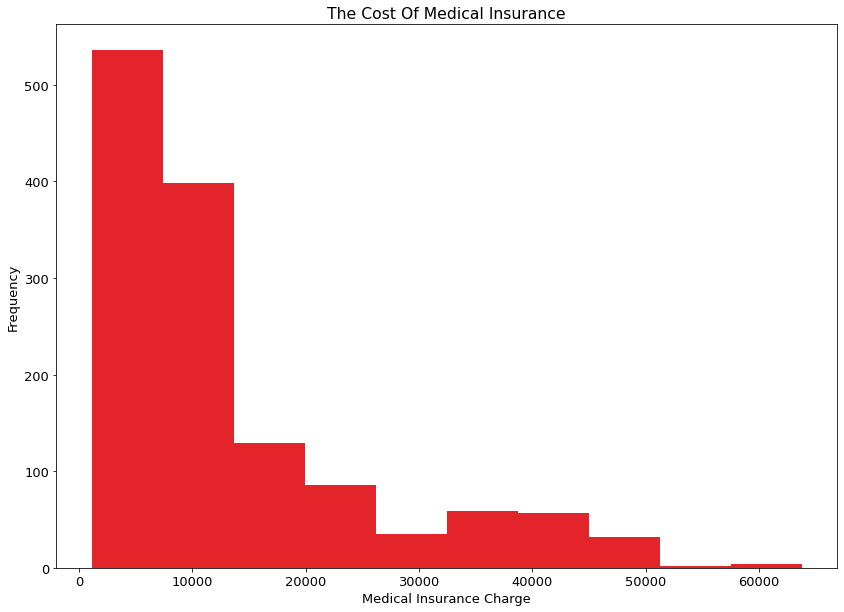

In [269]:
plt.figure(figsize=(14, 10))
plt.hist(dfMedicalInsurance["charges"], color='#E3242B')
plt.xlabel("Medical Insurance Charge")
plt.ylabel("Frequency")
plt.title("The Cost Of Medical Insurance")
plt.rc("font", size=13)
plt.show()

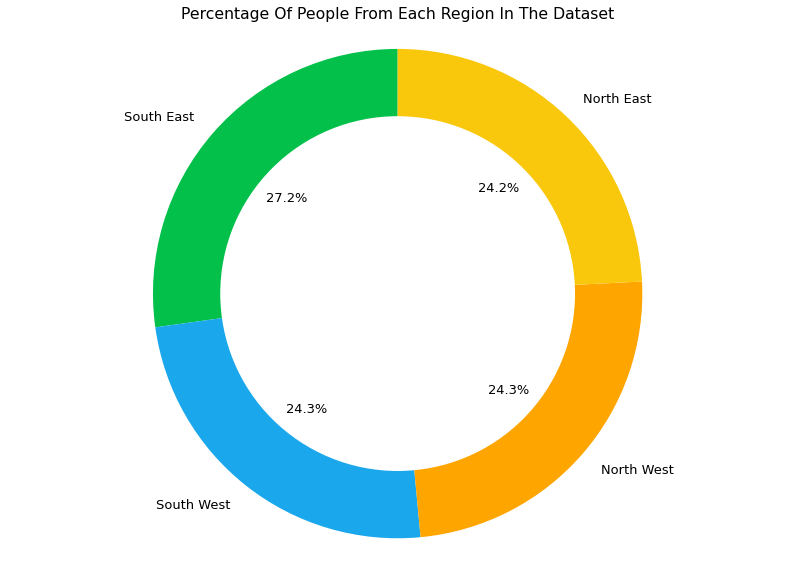

In [270]:
plt.figure(figsize=(14, 10))
plt.pie(dfMedicalInsurance["region"].value_counts(), 
        labels=['South East', 'South West', 'North West', 'North East'], 
        startangle=90, 
        autopct='%1.1f%%',
        colors=['#03C04A','#1AA7EC', '#FFA500', '#F9C70C'])
plt.gca().add_artist(plt.Circle((0,0), 0.725, fc='white'))
plt.rc('font', size=13)
plt.title('Percentage Of People From Each Region In The Dataset')
plt.axis('equal')  
plt.show()

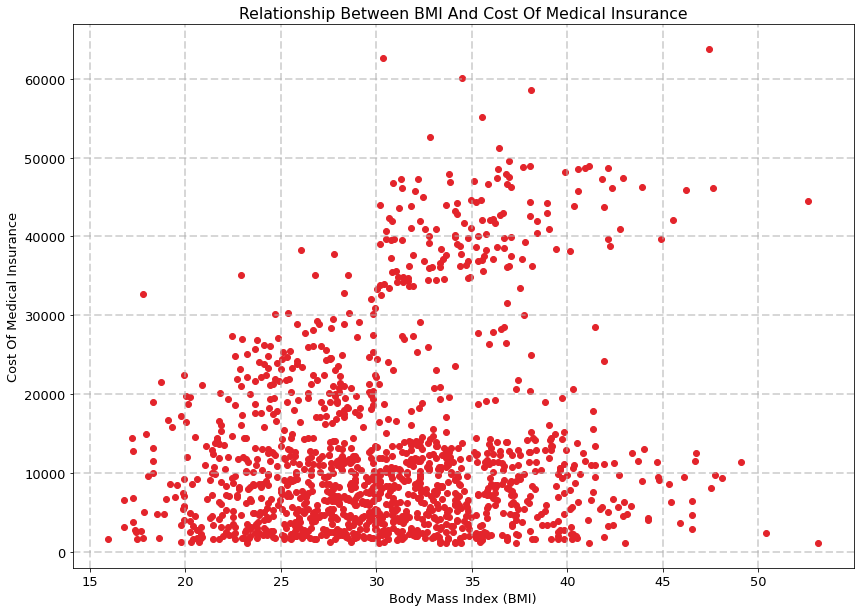

In [271]:
plt.figure(figsize=(14, 10))
plt.grid(linestyle = '--', linewidth = 2, alpha=0.5)
plt.scatter(dfMedicalInsurance["bmi"], dfMedicalInsurance["charges"], color='#E3242B')
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Cost Of Medical Insurance")
plt.title("Relationship Between BMI And Cost Of Medical Insurance")
plt.rc("font", size=13)
plt.show()

### Step 4
Perform Machine Learning Using The Imported Libraries To Predict How All The Variables Affect The Medical Insurance Charge. After Completing The Model, Calculate The $R^{2} Score$ Of It To Determine The Accuracy Of Your Predictions And Display the Results For Each Individual In the Test data With Their Details.

In [317]:
X = dfMedicalInsurance.drop(columns=['charges'])
Y = dfMedicalInsurance["charges"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25)
trainingModel = DecisionTreeRegressor()
trainingModel.fit(trainX, trainY)
predictionResults = trainingModel.predict(testX)
print("This Model Has An R2 Score Of: ", round(r2_score(testY, predictionResults), 2))

This Model Has An R2 Score Of:  0.78


In [318]:
testX.reset_index(drop=True, inplace=True)
testY = testY.tolist()
for i in range(len(testX)):
        
        x = testX.loc[i]
        
        if(x['sex'] == 1):
            gender = "Female"
        elif(x['sex'] == 0):
            gender = "Male"
        else:
            gender = "Unknown"
            
        if(x['smoker'] == 1):
            smoker = "Smoker"
        elif(x['smoker'] == 0):
            smoker = "Non-Smoker"
        else:
            smoker = "Unknown"
        
        if(x['region'] == 0):
            region = "South East"
        elif(x['region'] == 1):
            region = "North East"
        elif(x['region'] == 2):
            region = "South West"
        elif(x['region'] == 3):
            region = "North West"
        else:
            region = "Unknown"
        
        print("Details Of Patient " + str(i + 1) + ":")
        print("Age:", int(x['age']))
        print("Gender:", gender)
        print("BMI:", x['bmi'])
        print("No. Of Children:", int(x['children']))
        print("Smoker:", smoker)
        print("Region:", region)
        print("---------------------------------------------------")
        print("Estimated Medical Insurance (From Model): $" + str(round(predictionResults[i], 2)))
        print("---------------------------------------------------")
        print("Actual Medical Insurance: $" + str(round(testY[i], 2)))
        print("---------------------------------------------------\n")

Details Of Patient 1:
Age: 21
Gender: Male
BMI: 31.1
No. Of Children: 0
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $1909.53
---------------------------------------------------
Actual Medical Insurance: $1526.31
---------------------------------------------------

Details Of Patient 2:
Age: 29
Gender: Female
BMI: 32.11
No. Of Children: 2
Smoker: Non-Smoker
Region: North West
---------------------------------------------------
Estimated Medical Insurance (From Model): $4433.92
---------------------------------------------------
Actual Medical Insurance: $4922.92
---------------------------------------------------

Details Of Patient 3:
Age: 58
Gender: Male
BMI: 38.0
No. Of Children: 0
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $11362.76
---------------------------------------------------
Actual Medical Insurance:

Age: 64
Gender: Female
BMI: 32.965
No. Of Children: 0
Smoker: Non-Smoker
Region: North West
---------------------------------------------------
Estimated Medical Insurance (From Model): $13822.8
---------------------------------------------------
Actual Medical Insurance: $14692.67
---------------------------------------------------

Details Of Patient 83:
Age: 33
Gender: Male
BMI: 29.4
No. Of Children: 4
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $5375.04
---------------------------------------------------
Actual Medical Insurance: $6059.17
---------------------------------------------------

Details Of Patient 84:
Age: 30
Gender: Female
BMI: 32.4
No. Of Children: 1
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $4433.92
---------------------------------------------------
Actual Medical Insurance: $4149.74
-------

Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $8825.09
---------------------------------------------------
Actual Medical Insurance: $8823.28
---------------------------------------------------

Details Of Patient 159:
Age: 59
Gender: Female
BMI: 36.52
No. Of Children: 1
Smoker: Non-Smoker
Region: South East
---------------------------------------------------
Estimated Medical Insurance (From Model): $36910.61
---------------------------------------------------
Actual Medical Insurance: $28287.9
---------------------------------------------------

Details Of Patient 160:
Age: 53
Gender: Female
BMI: 35.9
No. Of Children: 2
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $11881.36
---------------------------------------------------
Actual Medical Insurance: $11163.57
---------------------------------------------------

Details Of Patient 1

---------------------------------------------------
Actual Medical Insurance: $5383.54
---------------------------------------------------

Details Of Patient 235:
Age: 56
Gender: Female
BMI: 25.3
No. Of Children: 0
Smoker: Non-Smoker
Region: South West
---------------------------------------------------
Estimated Medical Insurance (From Model): $11830.61
---------------------------------------------------
Actual Medical Insurance: $11070.53
---------------------------------------------------

Details Of Patient 236:
Age: 34
Gender: Male
BMI: 34.21
No. Of Children: 0
Smoker: Non-Smoker
Region: South East
---------------------------------------------------
Estimated Medical Insurance (From Model): $4518.83
---------------------------------------------------
Actual Medical Insurance: $3935.18
---------------------------------------------------

Details Of Patient 237:
Age: 57
Gender: Female
BMI: 20.1
No. Of Children: 1
Smoker: Non-Smoker
Region: South West
-------------------------------

Estimated Medical Insurance (From Model): $3537.7
---------------------------------------------------
Actual Medical Insurance: $1719.44
---------------------------------------------------

Details Of Patient 310:
Age: 48
Gender: Female
BMI: 36.575
No. Of Children: 0
Smoker: Non-Smoker
Region: North West
---------------------------------------------------
Estimated Medical Insurance (From Model): $26392.26
---------------------------------------------------
Actual Medical Insurance: $8671.19
---------------------------------------------------

Details Of Patient 311:
Age: 19
Gender: Female
BMI: 27.93
No. Of Children: 3
Smoker: Non-Smoker
Region: North West
---------------------------------------------------
Estimated Medical Insurance (From Model): $2331.52
---------------------------------------------------
Actual Medical Insurance: $18838.7
---------------------------------------------------

Details Of Patient 312:
Age: 59
Gender: Male
BMI: 37.4
No. Of Children: 0
Smoker: Non-Smoker

### Evaluation
Evaluate The Accuracy Of Your Model And How You Have Come To This Conclusion.

In This Experiment, I Used Machine Learning Using A Decision Tree Regressor As We Wanted To Predict A Quantity (Medical Insurance Cost) Based On The Input Data. The Model Produced Is Accurate To An Extent As Suggested By The $R^{2} Score$ Of 0.78 Which Is Close To 1.0 But Not Highly Accurate Which Suggests That This Model May Produce Erroneous Predictions In Some Cases Although This May Be Rare. Finally, The Above Summary For Each Patient With The Models Estimated Cost And The Actual Cost Is Relatively Similar For Most Patients Hence Suggesting That This Model Is Reliable And Useful.